In [1]:
pip install scipy pandas scikit-learn seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn import metrics
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Cargamoos el Dataset y mostramos las 5 primeras filaas 
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
dataset.shape

(200, 5)

In [59]:
print(dataset.info())
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [60]:
dataset = dataset.drop('CustomerID', axis=1)

<Axes: >

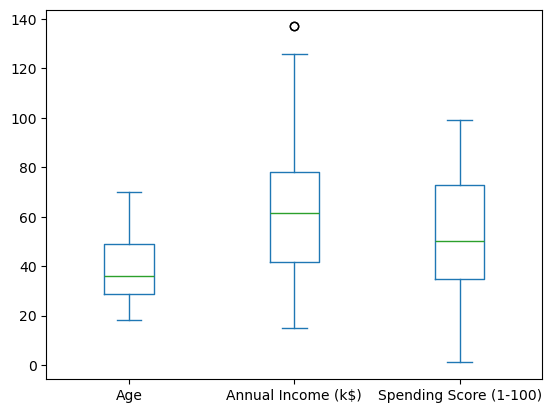

In [61]:
dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].plot(kind='box')

Debemos eliminar el dato atipico filtrando la columna de ingreso anual por valores menores o iguales a 135

<Axes: >

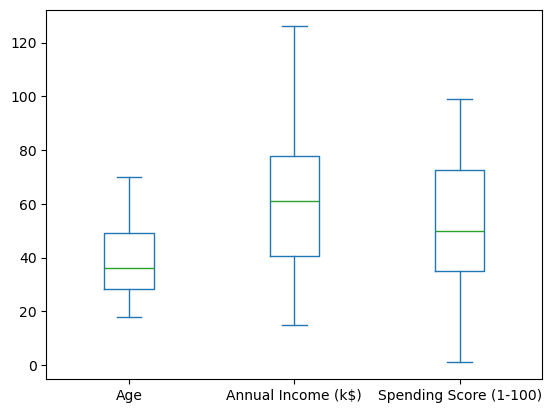

In [63]:
dataset = dataset[dataset["Annual Income (k$)"]<=135]
dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].plot(kind='box')

In [71]:
dataset["Gender"].value_counts()

Gender
Female    112
Male       86
Name: count, dtype: int64

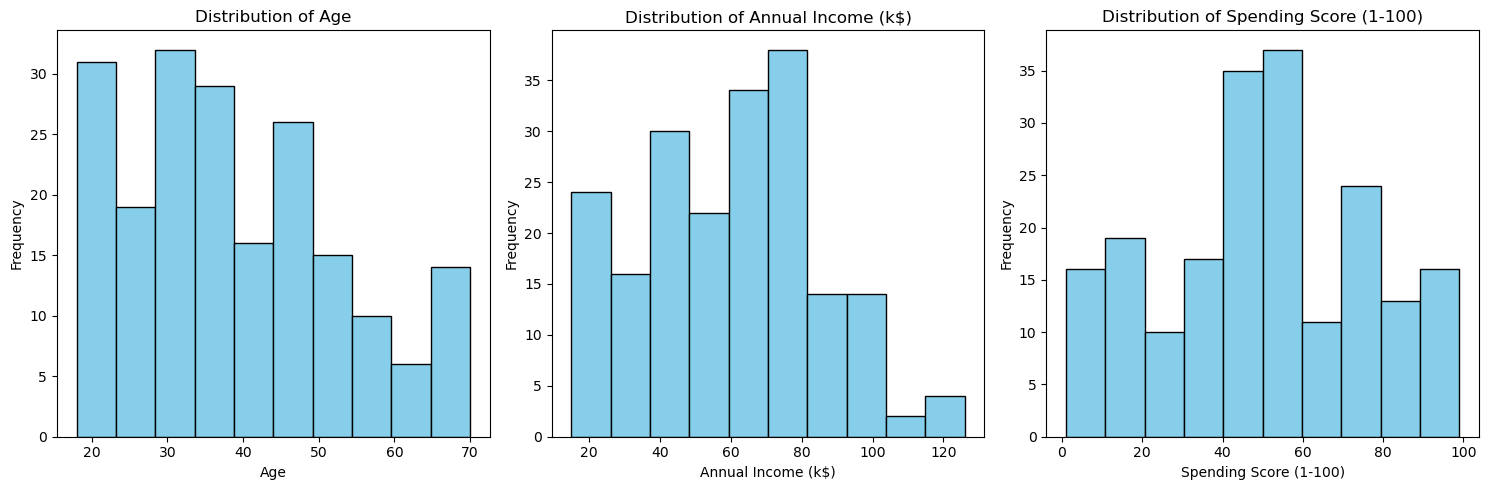

In [73]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Generación de histogramas para cada columna numérica
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)  # Crear subplots en una sola fila
    plt.hist(dataset[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
plt.tight_layout()  # Ajuste para evitar superposiciones
plt.show()

<Axes: >

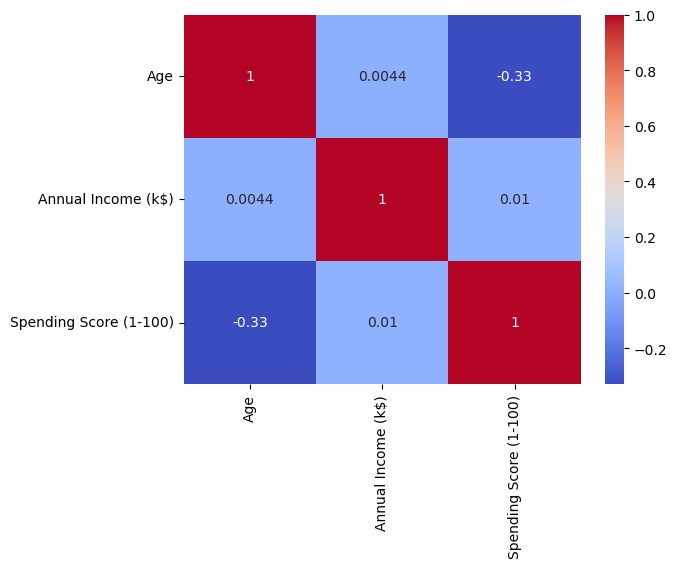

In [75]:
sns.heatmap(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')

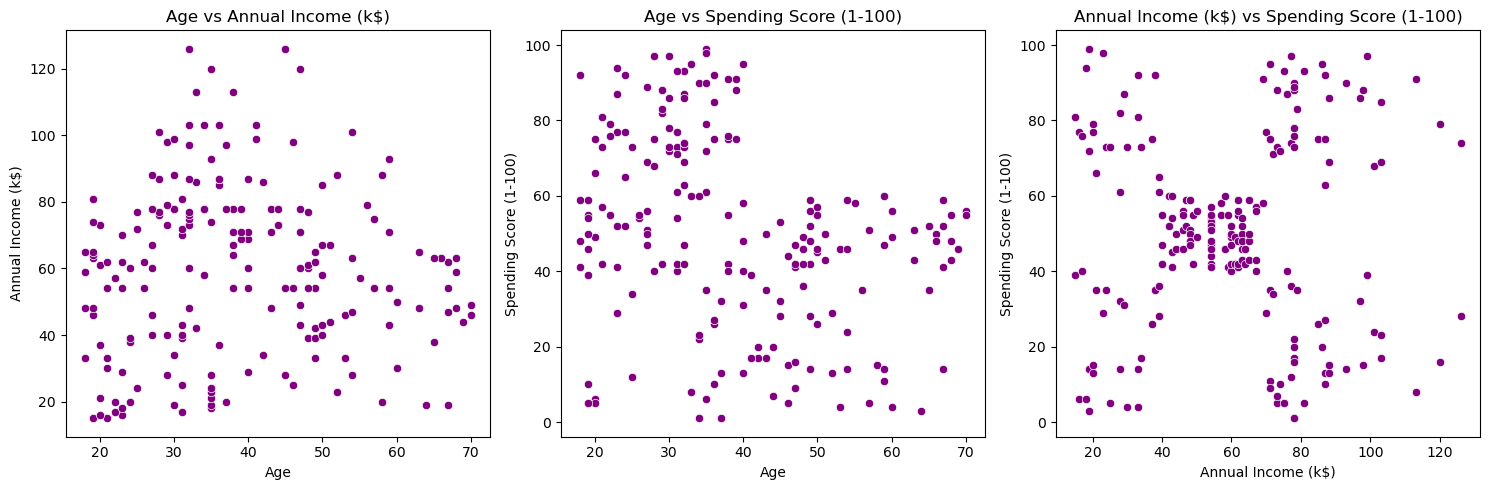

In [77]:
# Crear combinaciones de pares de columnas para scatter plots
pairs = [('Age', 'Annual Income (k$)'),
         ('Age', 'Spending Score (1-100)'),
         ('Annual Income (k$)', 'Spending Score (1-100)')]

# Crear una figura grande para contener todos los scatter plots
plt.figure(figsize=(15, 5))

# Generación de scatter plots para cada par de columnas
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(1, 3, i)  # Configuración de 1 fila y 3 columnas para subplots
    sns.scatterplot(data=dataset, x=x, y=y, color='purple')
    plt.title(f'{x} vs {y}')

plt.tight_layout()  # Ajuste del espaciado
plt.show()

In [79]:
# Codificación de gender
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

In [81]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]), columns=numerical_columns)
X["Gender"] = dataset["Gender"]
X.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,1.980000e+02,198.000000,1.980000e+02,198.000000
mean,1.435440e-16,0.000000,1.104616e-16,0.565657
std,1.002535e+00,1.002535,1.002535e+00,0.496927
min,-1.496937e+00,-1.779171,-1.915640e+00,0.000000
25%,-7.638208e-01,-0.766199,-5.917421e-01,0.000000
50%,-2.095134e-01,0.048151,-7.669638e-03,1.000000
75%,7.202926e-01,0.713534,8.781735e-01,1.000000
max,2.222287e+00,2.630236,1.900300e+00,1.000000


## Hierarchical_Clustering

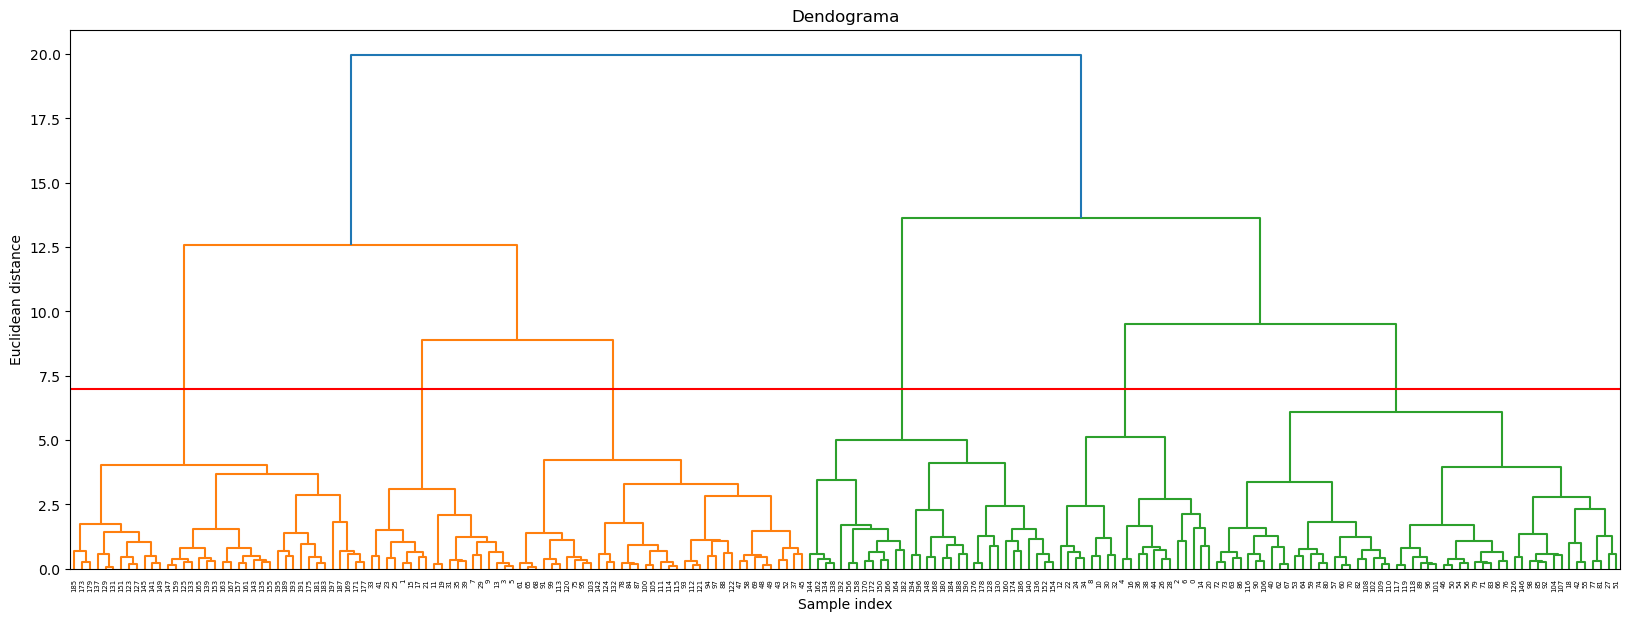

In [97]:
ward_clustering = linkage(X, method= "ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 7, color = 'r', linestyle = '-')
plt.title('Dendograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [216]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 0, 5, 1, 5,
       1, 5, 1, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 0, 5, 0, 4,
       1, 4, 0, 4, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 3, 4, 3, 0, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3],
      dtype=int64)

In [202]:
# Obtenemos las etiquetas de cada punto de nuestros datos 
labels = labels_hier
colores=['red', 'green', 'cyan', 'blue','yellow', 'orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])

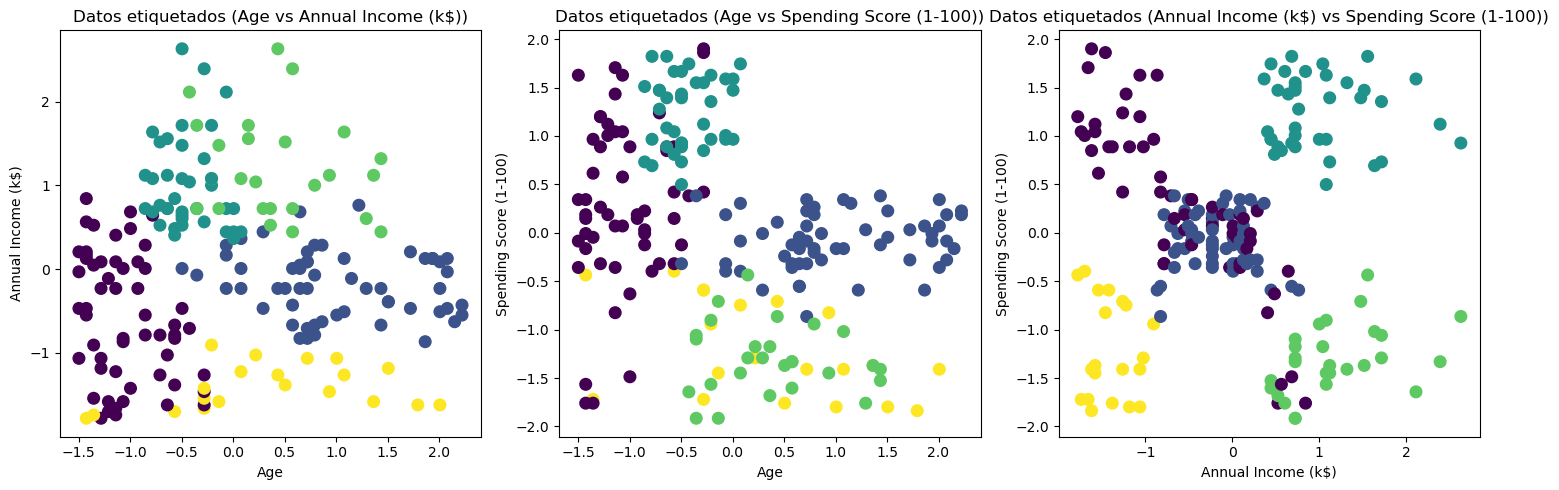

In [250]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Aplicar el algoritmo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
assign = model.fit_predict(X_scaled)

# Crear los gráficos para las combinaciones de características
pairs = [('Age', 'Annual Income (k$)'),
         ('Age', 'Spending Score (1-100)'),
         ('Annual Income (k$)', 'Spending Score (1-100)')]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (f1_name, f2_name) in enumerate(pairs):
    f1 = X[f1_name].values
    f2 = X[f2_name].values 
    
    # Gráfico de dispersión con los datos etiquetados por clusters
    axs[i].scatter(f1, f2, c=assign, s=70, cmap='viridis')  # Asigna color según los clusters
    axs[i].set_title(f"Datos etiquetados ({f1_name} vs {f2_name})")
    axs[i].set_xlabel(f1_name)
    axs[i].set_ylabel(f2_name)

plt.tight_layout()  
plt.show()

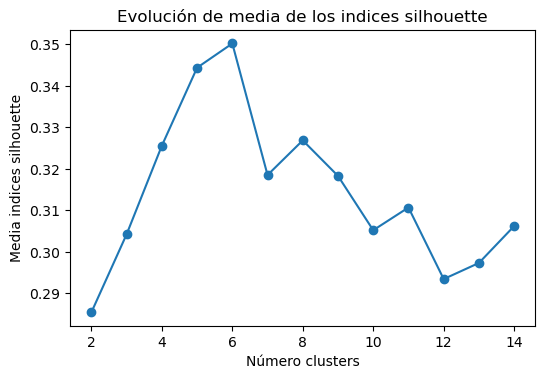

In [194]:
# Metododo  silhouette para identificar el número optimo de clusters

range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric = 'euclidean',
                    linkage = 'ward',
                    n_clusters = n_clusters
        )
                    
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=( 6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los indices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media indices silhouette');
              

In [220]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3],
      dtype=int64)

In [222]:
# Clacular medidas de calidad para clustering Jerárquico
print("nMedidadas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

nMedidadas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.325582774413095
Indice de Calinski-Harabasz: 88.34052261426152
Davies-Bouldin Index: 1.128851650322143


In [218]:
# Clacular medidas de calidad para clustering Jerárquico
print("nMedidadas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

nMedidadas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.3502288983923961
Indice de Calinski-Harabasz: 93.44710332894668
Davies-Bouldin Index: 1.0030749042840397


Analisis

Teniendo en cuenta los datos obtenidos se realizo una comparación usando 4 y 6 clusters para definir cual podría ser 
la mejor opción, llegando a la conclusión que con 6 clusters se obtiene los mejores resultados con nuetras medidas 
estando más cerca a 1; Puntaje de silueta: 0.3502288983923961, Indice de Calinski-Harabasz: 93.44710332894668 y
1.0030749042840397  Davies-Bouldin Index: a diferencia de utilizar 4 clusters estan un poco más lejos de 1.

In [231]:
# Calcular e coeficiente de correlación cofénetica
from scipy.cluster.hierarchy import linkage
# Compute las distancias
X_dist = pdist(X)
# Calcular la matriz de enlace
Z = linkage(X, 'ward')
# calcular el coeficiente de correlación cofenética
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofénetica:", coef_cofenetico)

Coeficiente de correlación cofénetica: (0.6154672129079564, array([19.95565063,  2.10960547, 19.95565063, ..., 19.95565063,
        2.85602635, 19.95565063]))


ANÁLISIS

Durante el análisis exploratorio, se detectó un dato atípico. Aunque no necesariamente es incorrecto, este dato ayuda a que los datos sean un poco más normales al ser considerado en el análisis.

Los diagramas de distribución revelan que la mayoría de los clientes se encuentran en el rango de edad de 20 a 50 años. Además, la mayor parte de los clientes tiene ingresos anuales entre 20K y 80K, y los puntajes de gasto más comunes están en un rango de entre 40 y 60.

El mapa de calor indica una correlación negativa entre la edad y el puntaje de gasto, sugiriendo que, a medida que las personas envejecen, tienden a gastar menos.

Se utiliza la curva del codo (elbow curve) para determinar el número óptimo de clusters, lo que resulta ser 5.


Utilizando el algoritmo de Hierarchica Clustering y teniendo en cuenta los datos obtenidos se realizo una comparación usando 4 y 6 clusters para definir cual podría ser la mejor opción, llegando a la conclusión que con 6 clusters se obtiene los mejores resultados con nuetras medidas estando más cerca a 1; Puntaje de silueta: 0.3502288983923961, Indice de Calinski-Harabasz: 93.44710332894668 y 1.0030749042840397 Davies-Bouldin Index: a diferencia de utilizar 4 clusters estan un poco más lejos de 1.

Al realizar diferentes puebas con otro número de clusters, el conjunto de medidas de calidad para el clustering jerárquico más óptimo es el siguiente:

Puntaje de Silueta: 0.35
Índice de Calinski-Harabasz: 93.45
Índice de Davies-Bouldin: 1.00

Que es al definir 6 clusters, aunque aún tiene un puntaje de silueta bajo (lo que indica que los clusters no están perfectamente definidos), el Índice de Davies-Bouldin y el Índice de Calinski-Harabasz son mejores comparados con las otras pruebas.

Razón de optimización:

Puntaje de Silueta (0.35): Aunque sigue siendo relativamente bajo, es más alto que en los intentos anteriores, lo que indica una ligera mejora en la calidad de la separación entre los clusters.

Índice de Calinski-Harabasz (93.45): Es uno de los valores más altos que has tenido, lo que indica que los clusters tienen una buena separación en términos de dispersión entre ellos.

Índice de Davies-Bouldin (1.00): Es un valor bastante bueno, pues indica que la separación de los clusters es relativamente adecuada.

En conclusión aunque el puntaje de silueta sigue siendo algo bajo, los otros dos índices (Calinski-Harabasz y Davies-Bouldin) sugieren que este conjunto de parámetros es el más óptimo hasta ahora.
